In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras
import tensorflow as tf
import pandas as pd

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

2 5 1


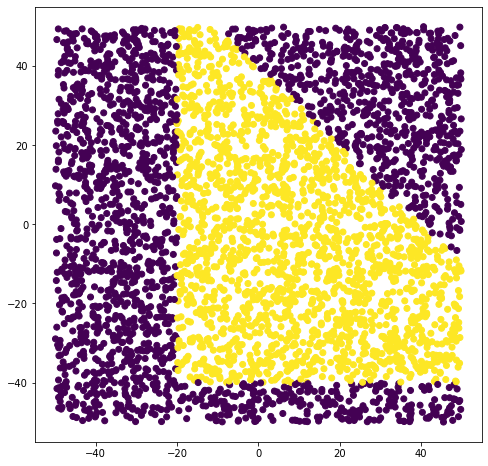

In [2]:
import numpy as np

# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout

import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

perc_train = 0.8
batch_size = 50

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


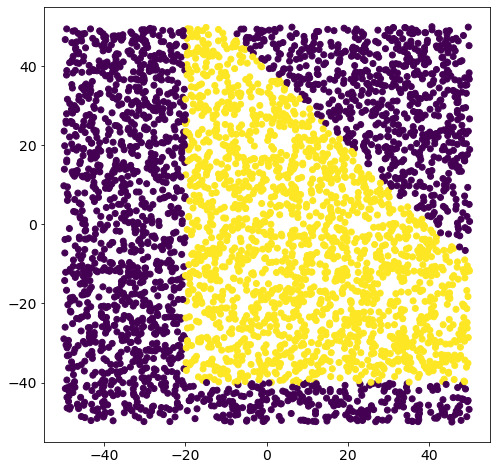

In [4]:
import numpy as np
TYPE = 1
x = np.loadtxt(filename("data",TYPE), delimiter=" ")
y = np.loadtxt(filename("labels",TYPE), delimiter=" ")

# dim of samaple
L = len(x[0])
print(L)

for i in range(10):
    print(x[i], y[i])

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
(x_train, y_train) = (x[0:N_train], y[0:N_train])
(x_valid, y_valid) = (x[N_train:], y[N_train:])
print("Train:", len(x_train), "\t Validation:", len(x_valid))





Train: 3200 	 Validation: 800


In [6]:
def Rescale(x):
    # return (x - x.mean())/np.sqrt(x.var())
    return x/(B/2)
x_train = Rescale(x_train)
x_valid = Rescale(x_valid)

In [7]:
np.random.seed(12345)
#def create_model(case = 1, optimizer = "adam", dropout_rate = 0.2, n_layers = 2,
#                 activation = 'relu', neurons = 20):
def create_DNN(case = 1):
  if case == 1:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='relu'))
      model.add(Dense(20, activation='relu'))
      model.add(Dense(20, activation='relu'))
      model.add(Dropout(0.2))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  if case == 2:
      model = Sequential()
      model.add(Dense(L, input_shape=(L,), activation='sigmoid'))
      model.add(Dense(3, activation='sigmoid'))
      model.add(Dense(1, activation='sigmoid'))
      nepoch = 400
  return model

#model  = create_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
#                      activation = 'relu', neurons = 20)

#model.summary()



In [8]:
loss = 'binary_crossentropy' 
optimizer = 'adam'           
metrics = ['accuracy']
def compile_model(case = 1, optimizer = "adam",dropout_rate = 0.2,n_layers = 2,
                      activation = 'relu', neurons = 20):
    # create the model
    model=create_DNN(case=case)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                 optimizer=optimizer,
                metrics=['accuracy'])
    return model

model = compile_model()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________


In [9]:
fit = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6666 - accuracy: 0.4794 - val_loss: 0.6414 - val_accuracy: 0.5312 - 958ms/epoch - 15ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6466 - accuracy: 0.5528 - val_loss: 0.6189 - val_accuracy: 0.6150 - 165ms/epoch - 3ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6207 - accuracy: 0.6144 - val_loss: 0.5916 - val_accuracy: 0.6450 - 122ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5867 - accuracy: 0.6778 - val_loss: 0.5515 - val_accuracy: 0.7588 - 116ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5355 - accuracy: 0.7412 - val_loss: 0.4962 - val_accuracy: 0.7887 - 115ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4812 - accuracy: 0.7825 - val_loss: 0.4466 - val_accuracy: 0.8062 - 110ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4440 - accuracy: 0.8012 - val_loss: 0.4136 - val_accuracy: 0.8138 - 117ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4167 - accuracy: 0.8153 - val_loss: 0.3935 - val_accuracy: 0.8313 - 113ms/epoch - 2ms/step
Epoch 9

In [10]:
history = model.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid))

Epoch 1/400
64/64 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9906 - val_loss: 0.0128 - val_accuracy: 0.9962
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.9919 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9906 - val_loss: 0.0125 - val_accuracy: 0.9962
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9894 - val_loss: 0.0121 - val_accuracy: 0.9962
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9903 - val_loss: 0.0125 - val_accuracy: 0.9962
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9925 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9906 - val_loss: 0.0090 - val_accuracy: 0.9975
Epoch 8/400
6

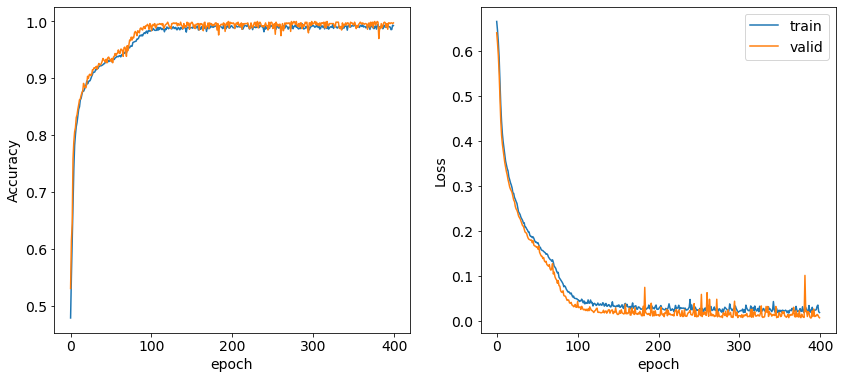

In [11]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid")
ax.set_xlabel('epoch')
ax.set_ylabel('Loss')
ax.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import layers
from tensorflow.keras import activations
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from keras.constraints import maxnorm

# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn=compile_model,epochs=1, verbose=1)

#other parameters
activations = [ 'sigmoid','relu','elu']
dropout_rates = [ 0.2, 0.4, 0.6]
n_layers=[4,6,8]
neurons = [20, 25, 30]
#batch_size = [50,70,90]
#epochs = [200, 400, 500]


# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adagrad', 'Adadelta','Adamax', 'Nadam']
# define parameter dictionary
#param_grid = dict( epochs=epochs, batch_size=batch_size)
param_grid = dict(optimizer=optimizer)#dict(optimizer=optimizer,activation=activations, n_layers=n_layers, neurons=neurons, dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations,dropout_rate=dropout_rates)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, neurons=neurons)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
param_grid = dict(optimizer=optimizer,activation=activations, dropout_rate=dropout_rates, n_layers=n_layers,)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train, y_train, validation_data=(x_valid, y_valid))

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



In [ ]:
results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('Grid_Search_Results.csv')
df_GridSearch = pd.read_csv('Grid_Search_Results.csv')
df_GridSearch = df_GridSearch.iloc[:,1:]
df_GridSearch.sort_values(by = "rank_test_score")
df_GridSearch

In [ ]:
from keras.engine import sequential
N = 400
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])


#second grid search:
#model2 = Sequential()
#model2.add(Dense(L,input_shape=(L,),activation='relu'))
#model2.add(Dense(20,activation='relu'))
#model2.add(Dense(20,activation='relu'))
##model2.add(Dropout(0)) #the default value is 0
#model2.add(Dense(1,activation='sigmoid'))

#nepoch=400
#model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#fit2 = model2.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),verbose=2)


#third grid search:
#model3 = Sequential()
#model3.add(Dense(L,input_shape=(L,),activation='elu'))
#model3.add(Dense(20,activation='elu'))
#model3.add(Dense(20,activation='elu'))
#model3.add(Dropout(0.2))
#model3.add(Dense(1,activation='sigmoid'))
#nepoch=400

#model3.compile(loss='binary_crossentropy',optimizer='Nadam',metrics=['accuracy'])
#fit3 = model3.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),verbose=2)

#forth grid search:
model4 = Sequential()
model4.add(Dense(L,input_shape=(L,),activation='relu'))
model4.add(Dense(20,activation='relu'))
model4.add(Dense(20,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(1,activation='sigmoid'))
nepoch=400
model4.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])
fit4 = model4.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

#fifth grid search
model5 = Sequential()
model5.add(Dense(L,input_shape=(L,),activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dense(20,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(1,activation='sigmoid'))
nepoch=400
model5.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
fit5 = model5.fit(x_train, y_train, epochs=400, batch_size=50, validation_data=(x_valid, y_valid),
               verbose=2)

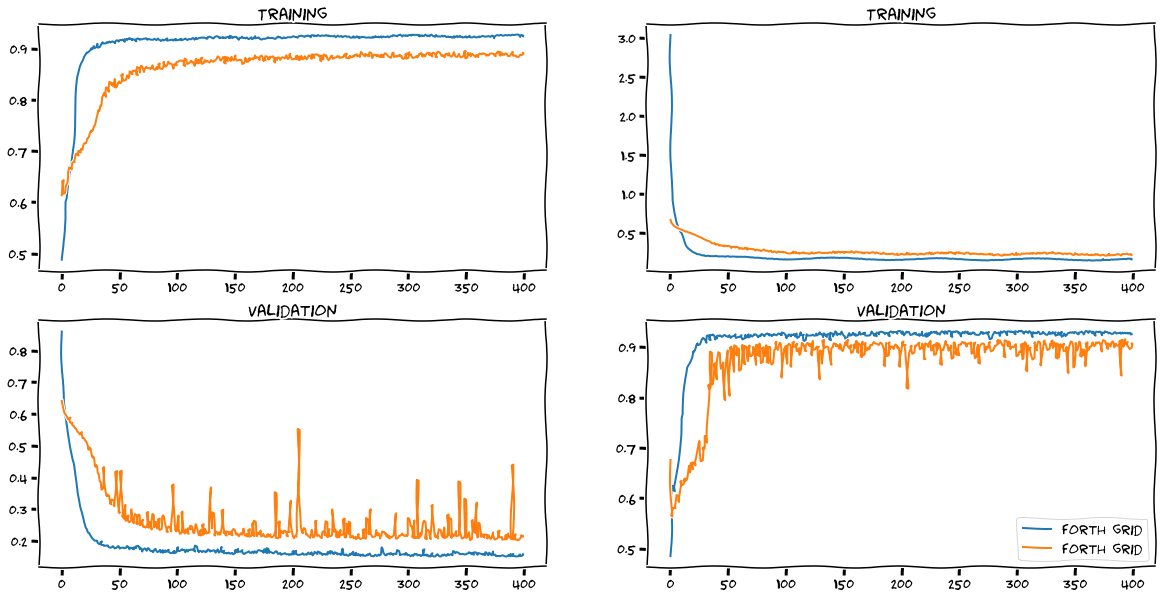

In [24]:


with plt.xkcd():
  fig, AX = plt.subplots(2, 2, figsize = (20, 10))
  ax = AX[0, 0]
  ax.plot(fit4.history['accuracy'], label = 'forth grid')
  ax.plot(fit5.history['accuracy'], label = 'fifth grid')
  ax.set_title('Training')

  ax = AX[0, 1]
  ax.plot(fit4.history['loss'], label = 'forth grid')
  ax.plot(fit5.history['loss'], label = 'fifth grid')
  ax.set_title('Training')
  ax = AX[1, 0]
  ax.plot(fit4.history['val_loss'], label = 'forth grid')
  ax.plot(fit5.history['val_loss'], label = 'fifth grid')
  ax.set_title('Validation')

  ax= AX[1, 1]
  ax.plot(fit4.history['val_accuracy'], label = 'forth grid')
  ax.plot(fit5.history['val_accuracy'], label = 'forth grid')
  ax.set_title('Validation')
  plt.legend(loc = 'best')



In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (600, 300))




<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b9db06e8-b879-40eb-b8fc-8366232e2a44' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>